<a href="https://colab.research.google.com/github/juliaNogueiraC/An-lise_de_Rotatividade_de_Funcion-rios_-Churn_Rate-/blob/main/An%C3%A1lise_de_Rotatividade_de_Funcion%C3%A1rios_(Churn_Rate).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto para analisar a rotatividade de funcionários. O projeto terá as eguintes etapas:

- Coleta e carregamento dos dados
- Exploração e limpeza dos dados
- Análise exploratória dos dados (EDA)
- Engenharia de características
- Construção e avaliação do modelo preditivo

Para este projeto, vamos supor que temos um dataset chamado employee_data.csv com as seguintes colunas:

- EmployeeID: Identificação do funcionário
- Age: Idade
- Department: Departamento
- YearsAtCompany: Anos na empresa
- JobSatisfaction: Satisfação no trabalho (escala de 1 a 5)
- Attrition: Rotatividade (Yes ou No)

In [ ]:
import pandas as pd

# Dados fictícios
data = {
    'EmployeeID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Age': [34, 29, 41, 22, 35, 28, 45, 31, 30, 38, 25, 26, 37, 24, 33, 40, 27, 29, 42, 32],
    'Department': ['Sales', 'Research & Development', 'Human Resources', 'Sales', 'Research & Development',
                   'Human Resources', 'Sales', 'Research & Development', 'Human Resources', 'Sales',
                   'Research & Development', 'Human Resources', 'Sales', 'Research & Development', 'Human Resources',
                   'Sales', 'Research & Development', 'Human Resources', 'Sales', 'Research & Development'],
    'YearsAtCompany': [6, 4, 9, 1, 7, 3, 10, 5, 4, 8, 2, 3, 6, 2, 5, 9, 3, 4, 11, 6],
    'JobSatisfaction': [4, 3, 5, 2, 4, 2, 3, 4, 3, 5, 1, 3, 4, 2, 3, 5, 2, 4, 3, 4],
    'Attrition': ['No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No']
}

# Criar DataFrame
df = pd.DataFrame(data)

# Salvar DataFrame como CSV
df.to_csv('employee_data.csv', index=False)

# Verificar se o arquivo foi salvo corretamente
print(df.head())


   EmployeeID  Age              Department  YearsAtCompany  JobSatisfaction  \
0           1   34                   Sales               6                4   
1           2   29  Research & Development               4                3   
2           3   41         Human Resources               9                5   
3           4   22                   Sales               1                2   
4           5   35  Research & Development               7                4   

  Attrition  
0        No  
1       Yes  
2        No  
3       Yes  
4        No  


##Passo 1: Coleta e carregamento dos dados

In [ ]:
import pandas as pd

# Carregar os dados
data = pd.read_csv('employee_data.csv')

# Mostrar as primeiras linhas do dataset
print(data.head())


   EmployeeID  Age              Department  YearsAtCompany  JobSatisfaction  \
0           1   34                   Sales               6                4   
1           2   29  Research & Development               4                3   
2           3   41         Human Resources               9                5   
3           4   22                   Sales               1                2   
4           5   35  Research & Development               7                4   

  Attrition  
0        No  
1       Yes  
2        No  
3       Yes  
4        No  


##Passo 2: Exploração e limpeza dos dados

In [ ]:
print("Tipos das colunas deste dataset:")
print(data.info())

print("------------------------------------")

print("Estatísticas descritivas do dataset: ")

print(data.describe())


print("------------------------------------")
print("Quantidade de valores nulos por coluna:")

print(data.isnull().sum())

Tipos das colunas deste dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   EmployeeID       20 non-null     int64 
 1   Age              20 non-null     int64 
 2   Department       20 non-null     object
 3   YearsAtCompany   20 non-null     int64 
 4   JobSatisfaction  20 non-null     int64 
 5   Attrition        20 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.1+ KB
None
------------------------------------
Estatísticas descritivas do dataset: 
       EmployeeID        Age  YearsAtCompany  JobSatisfaction
count    20.00000  20.000000        20.00000        20.000000
mean     10.50000  32.400000         5.40000         3.300000
std       5.91608   6.483988         2.85436         1.128576
min       1.00000  22.000000         1.00000         1.000000
25%       5.75000  27.750000         3.00000         2.750000
50%

In [ ]:
# Preencher ou remover valores ausentes (se houver)
#data['Coluna'] = data['Coluna'].fillna(valor)  # Exemplo de preenchimento
# data = data.dropna()  # Exemplo de remoção

##Passo 3: Análise exploratória dos dados (EDA)

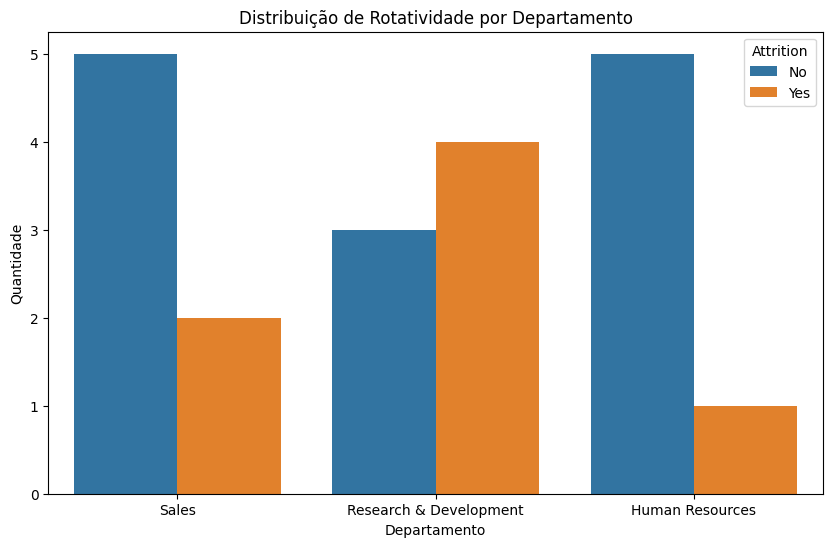

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=data)
plt.title('Distribuição de Rotatividade por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Quantidade')
plt.show()

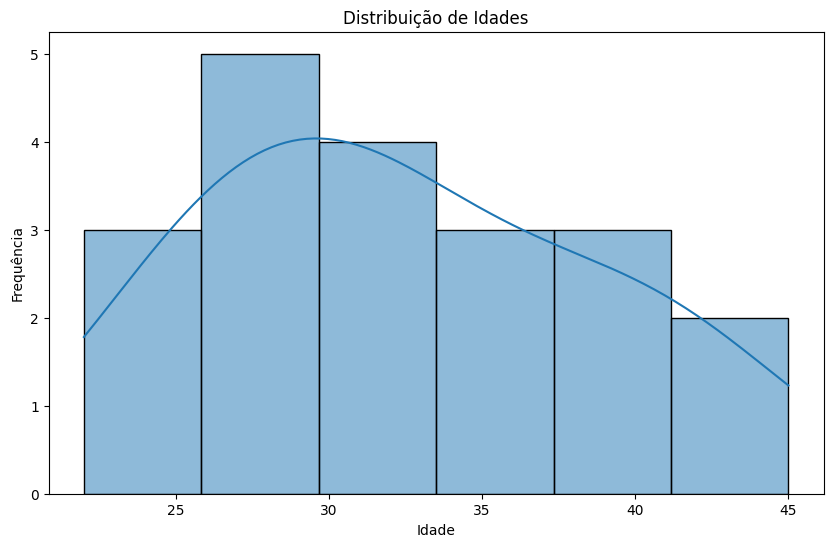

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

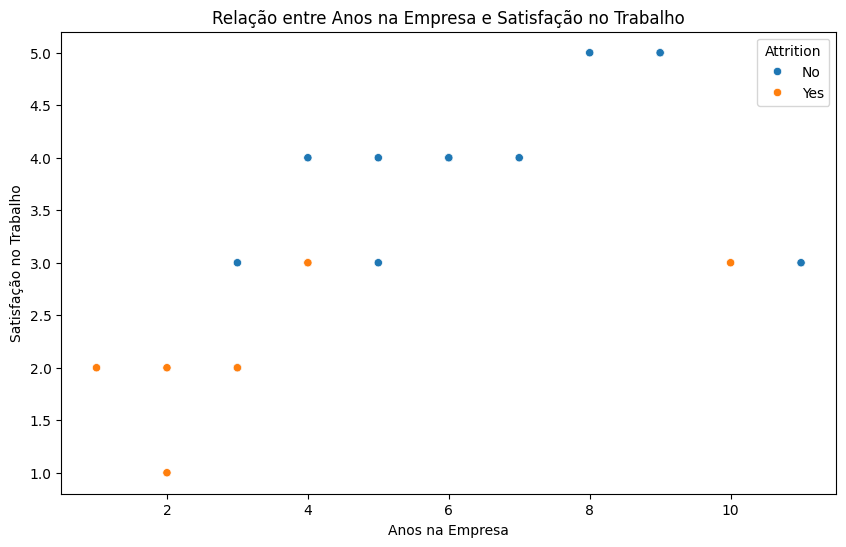

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsAtCompany', y='JobSatisfaction', hue='Attrition', data=data)
plt.title('Relação entre Anos na Empresa e Satisfação no Trabalho')
plt.xlabel('Anos na Empresa')
plt.ylabel('Satisfação no Trabalho')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

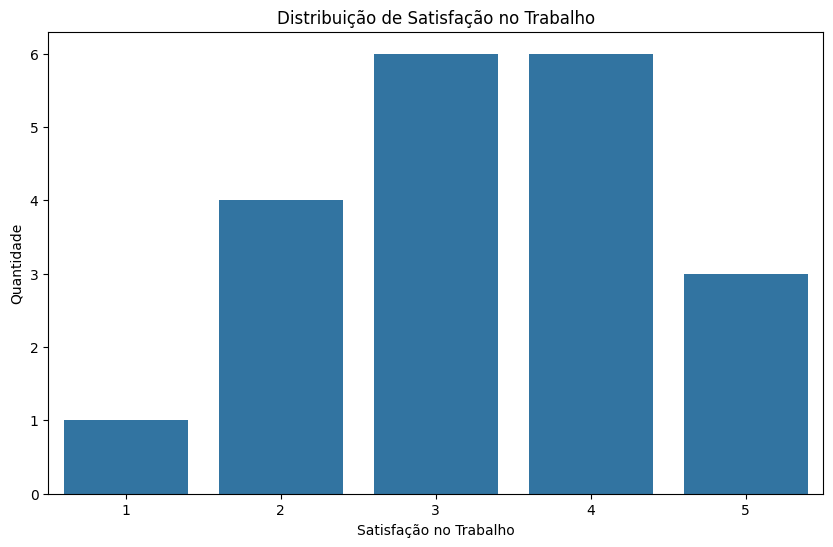

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSatisfaction', data=data)
plt.title('Distribuição de Satisfação no Trabalho')
plt.xlabel('Satisfação no Trabalho')
plt.ylabel('Quantidade')
plt.show

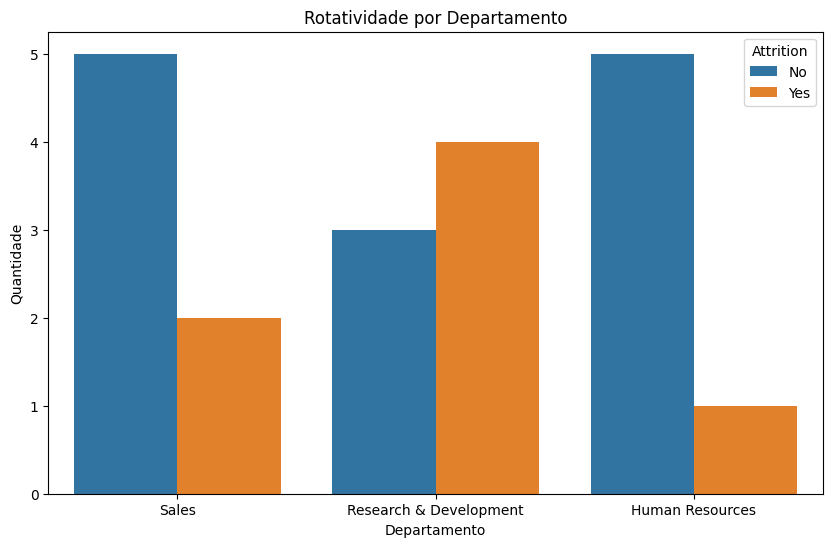

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=data)
plt.title('Rotatividade por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Quantidade')
plt.show()

##Passo 4: Engenharia de características
Vamos preparar os dados para a modelagem. Isso inclui transformar variáveis categóricas em numéricas e dividir os dados em treino e teste.

1. Transformação de Variáveis Categóricas: As variáveis categóricas (como Department e Attrition) precisam ser convertidas em um formato numérico porque a maioria dos algoritmos de machine learning trabalha com números. Utilizamos LabelEncoder para fazer essa conversão.

2. Divisão dos Dados em Características (X) e Rótulo (y): Separamos os dados em duas partes:

- X: as características ou variáveis independentes (todas as colunas exceto Attrition).

3. y: o rótulo ou variável dependente (a coluna Attrition).
Divisão dos Dados em Conjuntos de Treino e Teste: Dividimos os dados em dois conjuntos:

- Conjunto de Treino: usado para treinar o modelo.
- Conjunto de Teste: usado para avaliar a performance do modelo.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



In [ ]:
label_encoder = LabelEncoder()
data['Department'] = label_encoder.fit_transform(data['Department'])
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])

print(data.head())

   EmployeeID  Age  Department  YearsAtCompany  JobSatisfaction  Attrition
0           1   34           2               6                4          0
1           2   29           1               4                3          1
2           3   41           0               9                5          0
3           4   22           2               1                2          1
4           5   35           1               7                4          0


### Divisão dos Dados em Características (X) e Rótulo (y)

- Características (X): São as variáveis independentes usadas para prever a variável dependente. Neste caso, todas as colunas exceto EmployeeID e Attrition.

- Rótulo (y): É a variável dependente que queremos prever. Neste caso, a coluna Attrition.

In [ ]:
x = data.drop(columns=['EmployeeID', 'Attrition'])
y = data['Attrition']

print(x.head())

print("--------------------------------")
print(y.head())

   Age  Department  YearsAtCompany  JobSatisfaction
0   34           2               6                4
1   29           1               4                3
2   41           0               9                5
3   22           2               1                2
4   35           1               7                4
--------------------------------
0    0
1    1
2    0
3    1
4    0
Name: Attrition, dtype: int64


###Divisão dos Dados em Conjuntos de Treino e Teste

- train_test_split: Dividimos os dados em conjuntos de treino e teste. O conjunto de treino é usado para treinar o modelo, enquanto o conjunto de teste é usado para avaliar o desempenho do modelo.

- test_size=0.3: Significa que 30% dos dados serão usados para teste e 70% para treino.

- random_state=42: Garante que a divisão dos dados será a mesma toda vez que executarmos o código (para reprodutibilidade).

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("Tamanho do conjunto de treino:", x_train.shape[0])

print("---------------------------------------------------")
print("Tamanho do conjunto de teste:", x_test.shape[0])



Tamanho do conjunto de treino: 14
---------------------------------------------------
Tamanho do conjunto de teste: 6


##Passo 5: Construção e avaliação do modelo preditivo

Vamos construir um modelo de Regressão Logística para prever a rotatividade e avaliar seu desempenho.

1. Construção do Modelo: Escolhemos um algoritmo de machine learning e criamos uma instância do modelo.
2. Treinamento do Modelo: Treinamos o modelo com os dados de treino (X_train e y_train).
3. Previsões com o Modelo: Usamos o modelo treinado para fazer previsões no conjunto de teste (X_test).
4. Avaliação do Modelo: Avaliamos o desempenho do modelo usando métricas apropriadas.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Instanciar o modelo
model = LogisticRegression(max_iter=1000, random_state=42)

# Treinar o modelo
model.fit(x_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(x_test)


# Avaliar o desempenho do modelo
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("---------------------------------------------------")

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("---------------------------------------------------")


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.00      0.00      0.00         2

    accuracy                           0.50         6
   macro avg       0.30      0.38      0.33         6
weighted avg       0.40      0.50      0.44         6

---------------------------------------------------
Matriz de Confusão:
[[3 1]
 [2 0]]
---------------------------------------------------


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Import the missing function


# Acurácia do Modelo
accuracy = accuracy_score(y_test, y_pred) # Now you can use the function
print("Acurácia do Modelo:", accuracy)

Acurácia do Modelo: 0.5


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Dados fictícios para exemplo
data = {
    'EmployeeID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Age': [34, 29, 41, 22, 35, 28, 45, 31, 30, 38, 25, 26, 37, 24, 33, 40, 27, 29, 42, 32],
    'Department': ['Sales', 'Research & Development', 'Human Resources', 'Sales', 'Research & Development',
                   'Human Resources', 'Sales', 'Research & Development', 'Human Resources', 'Sales',
                   'Research & Development', 'Human Resources', 'Sales', 'Research & Development', 'Human Resources',
                   'Sales', 'Research & Development', 'Human Resources', 'Sales', 'Research & Development'],
    'YearsAtCompany': [6, 4, 9, 1, 7, 3, 10, 5, 4, 8, 2, 3, 6, 2, 5, 9, 3, 4, 11, 6],
    'JobSatisfaction': [4, 3, 5, 2, 4, 2, 3, 4, 3, 5, 1, 3, 4, 2, 3, 5, 2, 4, 3, 4],
    'Attrition': ['No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No']
}

# Criar DataFrame
df = pd.DataFrame(data)

# Transformar variáveis categóricas
label_encoder = LabelEncoder()
df['Department'] = label_encoder.fit_transform(df['Department'])
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])

# Dividir os dados em características (X) e rótulo (y)
X = df.drop(columns=['EmployeeID', 'Attrition'])
y = df['Attrition']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Construção do Modelo
model = LogisticRegression(max_iter=1000, random_state=42)

# Treinamento do Modelo
model.fit(X_train, y_train)

# Previsões com o Modelo
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Criar DataFrame para mostrar as previsões e as probabilidades
result_df = pd.DataFrame({
    'EmployeeID': df.loc[X_test.index, 'EmployeeID'],
    'True Attrition': y_test,
    'Predicted Attrition': y_pred,
    'Probability of Staying': y_pred_proba[:, 0],
    'Probability of Leaving': y_pred_proba[:, 1]
})

# Mapear valores 0 e 1 para 'No' e 'Yes'
result_df['True Attrition'] = result_df['True Attrition'].map({0: 'No', 1: 'Yes'})
result_df['Predicted Attrition'] = result_df['Predicted Attrition'].map({0: 'No', 1: 'Yes'})

print("\nPrevisões Detalhadas:")
print(result_df.to_string(index=False))



Previsões Detalhadas:
 EmployeeID True Attrition Predicted Attrition  Probability of Staying  Probability of Leaving
          1             No                  No                0.808776                0.191224
         18             No                  No                0.930096                0.069904
         16             No                  No                0.967194                0.032806
          2            Yes                  No                0.624395                0.375605
          9            Yes                  No                0.745352                0.254648
          6             No                 Yes                0.378219                0.621781



Previsões Detalhadas:
 EmployeeID True Attrition Predicted Attrition  Probability of Staying  Probability of Leaving
          1             No                  No                   80.88                   19.12
         18             No                  No                   93.01                    6.99
         16             No                  No                   96.72                    3.28
          2            Yes                  No                   62.44                   37.56
          9            Yes                  No                   74.54                   25.46
          6             No                 Yes                   37.82                   62.18
------------------------------------------------------------------
------------------------------------------------------------------
------------------------------------------------------------------


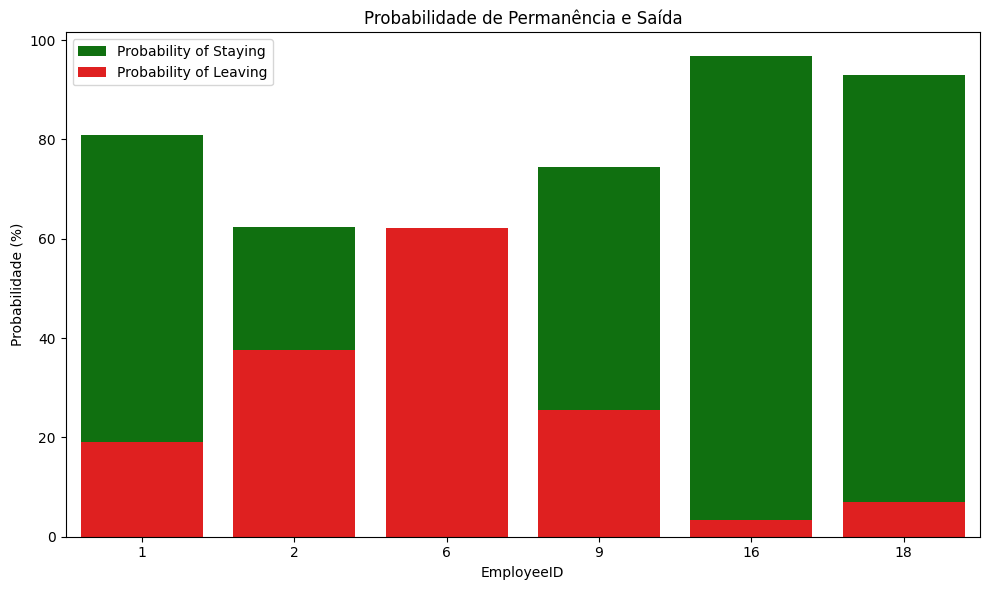

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Dados fictícios para exemplo
data = {
    'EmployeeID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Age': [34, 29, 41, 22, 35, 28, 45, 31, 30, 38, 25, 26, 37, 24, 33, 40, 27, 29, 42, 32],
    'Department': ['Sales', 'Research & Development', 'Human Resources', 'Sales', 'Research & Development',
                   'Human Resources', 'Sales', 'Research & Development', 'Human Resources', 'Sales',
                   'Research & Development', 'Human Resources', 'Sales', 'Research & Development', 'Human Resources',
                   'Sales', 'Research & Development', 'Human Resources', 'Sales', 'Research & Development'],
    'YearsAtCompany': [6, 4, 9, 1, 7, 3, 10, 5, 4, 8, 2, 3, 6, 2, 5, 9, 3, 4, 11, 6],
    'JobSatisfaction': [4, 3, 5, 2, 4, 2, 3, 4, 3, 5, 1, 3, 4, 2, 3, 5, 2, 4, 3, 4],
    'Attrition': ['No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No']
}

# Criar DataFrame
df = pd.DataFrame(data)

# Transformar variáveis categóricas
label_encoder = LabelEncoder()
df['Department'] = label_encoder.fit_transform(df['Department'])
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])

# Dividir os dados em características (X) e rótulo (y)
X = df.drop(columns=['EmployeeID', 'Attrition'])
y = df['Attrition']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Construção do Modelo
model = LogisticRegression(max_iter=1000, random_state=42)

# Treinamento do Modelo
model.fit(X_train, y_train)

# Previsões com o Modelo
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Criar DataFrame para mostrar as previsões e as probabilidades
result_df = pd.DataFrame({
    'EmployeeID': df.loc[X_test.index, 'EmployeeID'],
    'True Attrition': y_test,
    'Predicted Attrition': y_pred,
    'Probability of Staying': y_pred_proba[:, 0] * 100,
    'Probability of Leaving': y_pred_proba[:, 1] * 100
})

# Mapear valores 0 e 1 para 'No' e 'Yes'
result_df['True Attrition'] = result_df['True Attrition'].map({0: 'No', 1: 'Yes'})
result_df['Predicted Attrition'] = result_df['Predicted Attrition'].map({0: 'No', 1: 'Yes'})

# Arredondar probabilidades para duas casas decimais
result_df['Probability of Staying'] = result_df['Probability of Staying'].round(2)
result_df['Probability of Leaving'] = result_df['Probability of Leaving'].round(2)

print("\nPrevisões Detalhadas:")
print(result_df.to_string(index=False))

print("------------------------------------------------------------------")
print("------------------------------------------------------------------")
print("------------------------------------------------------------------")
# Plotar gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='EmployeeID', y='Probability of Staying', data=result_df, color='green', label='Probability of Staying')
sns.barplot(x='EmployeeID', y='Probability of Leaving', data=result_df, color='red', label='Probability of Leaving')
plt.title('Probabilidade de Permanência e Saída')
plt.xlabel('EmployeeID')
plt.ylabel('Probabilidade (%)')
plt.legend()
plt.tight_layout()
plt.show()


## Probabilidade média de permanência e saída para todos os funcionários

Este código calcula a média das probabilidades de permanência e saída para todos os funcionários e, em seguida, cria um gráfico de barras que mostra essas médias. A cor verde representa a probabilidade de permanência e a cor vermelha representa a probabilidade de saída.




<ipython-input-36-a1fbbe8da015>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Status', y='Probability', data=mean_proba_df, palette=['green', 'red'])


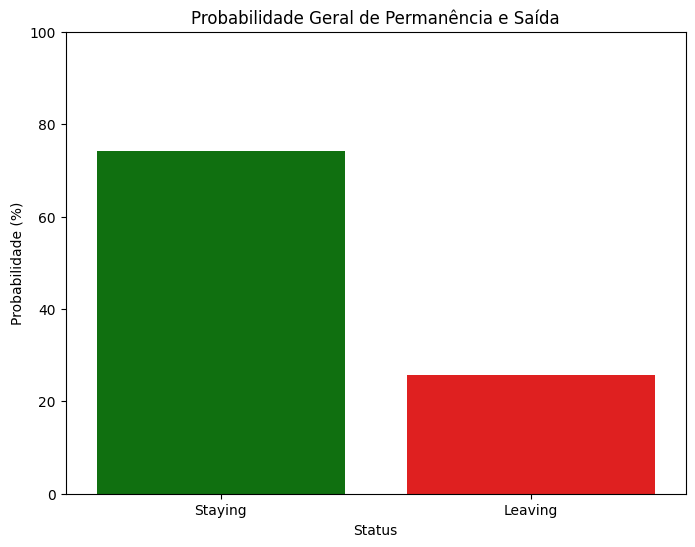

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code to create result_df) ...

# Calculate mean probabilities
mean_proba_stay = result_df['Probability of Staying'].mean()
mean_proba_leave = result_df['Probability of Leaving'].mean()

# Create mean_proba_df DataFrame
mean_proba_df = pd.DataFrame({
    'Status': ['Staying', 'Leaving'],
    'Probability': [mean_proba_stay, mean_proba_leave]
})

# Plot the graph
plt.figure(figsize=(8, 6))
sns.barplot(x='Status', y='Probability', data=mean_proba_df, palette=['green', 'red'])
plt.title('Probabilidade Geral de Permanência e Saída')
plt.ylabel('Probabilidade (%)')
plt.xlabel('Status')
plt.ylim(0, 100)
plt.show()

## Resumo
- Construção do Modelo: Criamos uma instância do modelo de Regressão Logística.
- Treinamento do Modelo: Treinamos o modelo com os dados de treino usando model.fit.
- Previsões com o Modelo: Usamos model.predict para fazer previsões no conjunto de teste.
- Avaliação do Modelo: Avaliamos o desempenho do modelo com a matriz de confusão, o relatório de classificação e a acurácia.